In [1]:
%reset -f
%run pylib/tools dark
# plt.rcParams['figure.facecolor']='k'
from pylib.ipynb_docgen import *
show(f"""# DR4 Gevatar candidate selection""");show_date()
show("""[confluence](https://confluence.slac.stanford.edu/display/SCIGRPS/Gevatar+selection)""")

# DR4 Gevatar candidate selection

<h5 style="text-align:right; margin-right:15px"> 2025-02-07 14:39</h5>

[confluence](https://confluence.slac.stanford.edu/display/SCIGRPS/Gevatar+selection)

In [2]:
show("""## Load DR4 and add $G$""")
from pylib.catalogs import Fermi4FGL
from pylib.ml_fit import lp_pars
from pylib.diffuse import Diffuse
from astropy.coordinates import SkyCoord
set_theme(['dark'])
fgl = Fermi4FGL()
sdirs = SkyCoord(fgl.glon, fgl.glat, unit='deg', frame='galactic')
# fgl['G'] = Diffuse().get_values_at(sdirs)
fgdf = lp_pars(fgl)
fgdf['class1'] = fgl.class1
fgdf['eflux']  = fgl.eflux
fgdf['G']= Diffuse().get_values_at(sdirs)
fgdf['R95'] = np.sqrt(fgl.get_series('Conf_95_SemiMajor')*fgl.get_series('Conf_95_SemiMinor'))*60
fgdf['dec'] = fgl.get_series('DEJ2000').astype(float)
fgdf['glon'] = fgl.get_series('GLON').astype(float)
fgdf['glat'] = fgl.get_series('GLAT').astype(float)

# fgdf = fgl.copy()
def reclassify(class1):            
    cl = class1.lower()
    if cl == '' : return 'unID'
    if cl in 'fsrq bll bcu'.split(): return 'blazar'
    if cl in 'msp psr'.split(): return cl
    return 'other'
fgdf['association'] = fgdf.class1.apply(reclassify)
fgdf['S'] = fgl.eflux
fgdf['logS'] = np.log10(fgl.eflux)
show(pd.Series(fgdf.groupby('association').size(),name='#'))

## Load DR4 and add $G$

Loaded Fermi 4FGL gll_psc_v32.fit: 7195 entries
* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_uw1216_v13.fits`
  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$
 select energy= 1000 MeV


association,blazar,msp,other,psr,unID
#,3934,179,511,141,2430


## Differential logN-logS: $S^2 \frac{dN}{dS}$ vs $\log{S}$
This corresponds to the  [Marcotulli et al. (MMA)](https://arxiv.org/pdf/2006.04703) Figure 6 upper right, except that $N$ is total 
 counts rather than counts / $\mathrm{deg}^{2}$, and I don't
 apply a detection efficiency factor.
Distributions for associated blazars (bll+fsrq+bcu), msp, psr and unID

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2976a0ebc0>
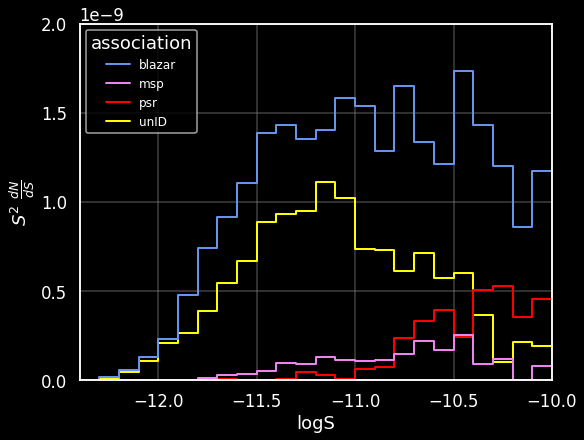

In [3]:
show(r"""## Differential logN-logS: $S^2 \frac{dN}{dS}$ vs $\log{S}$
This corresponds to the  [Marcotulli et al. (MMA)](https://arxiv.org/pdf/2006.04703) Figure 6 upper right, except that $N$ is total 
 counts rather than counts / $\mathrm{deg}^{2}$, and I don't
 apply a detection efficiency factor.
Distributions for associated blazars (bll+fsrq+bcu), msp, psr and unID""")

fig, ax =plt.subplots(figsize=(8,6))
sns.histplot(fgdf, x='logS', element='step', fill=False, lw=2,
             weights='S',
             hue ='association', 
             hue_order='blazar msp psr unID'.split(), 
             palette='cornflowerblue violet red yellow'.split(),
             bins= np.linspace(-12.4, -10, 25));
ax.set(ylabel=r'$S^2\ \frac{dN}{dS}$', xlim=(-12.4,-10), yticks=np.arange(0,2.1e-9,0.5e-9),)
sns.move_legend(ax, loc='upper left', fontsize=12);
show(fig)

## Now with ranges in $G$

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f29768a8a90>
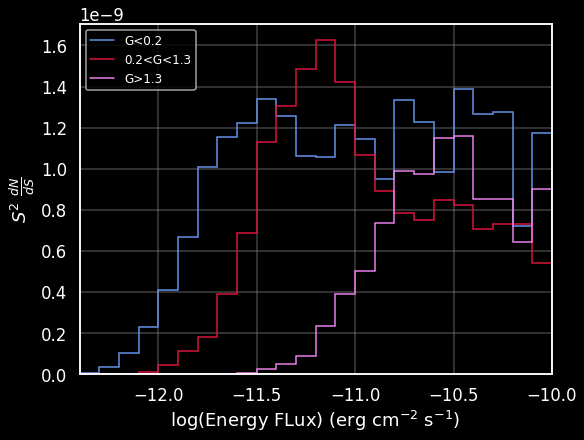

Notes:
* MMA chose to include sources with $|b|>20^\circ$, or $0.659\times 4\pi$,  $27143.61 \deg^2$
<br>Their value at -10.5: 5.4e-9 $\mathrm{erg\ cm^{-2}\ s^{-1}}$
* My solid angle fractions are $0.730, 0.260, 0.010\$

In [4]:
show(f"""## Now with ranges in $G$""")

def s2dnds_logs(df, ax=None, no_xlabel=False):
    # if df is None: 
    #     df = self.df.copy()
    # df['S'] = df.eflux100
    # df['logS'] = np.log10(df.S)
    
    bins = np.linspace(-12.4, -10, 25)
     
    fig, ax = plt.subplots(figsize=(8,6)) if ax is None else (ax.figure,ax)
    for q, color in zip(['G<0.2','0.2<G<1.3','G>1.3'],
                        'cornflowerblue crimson violet' .split()):
        S = df.query(q).S
        dNdlogS, _ = np.histogram(np.log10(S), bins, weights=S) 
        ax.stairs(dNdlogS, bins, label=q, color=color)
    ax.legend(fontsize=12)
    ax.set( xlim=(-12.4, -10), ylim=(0,None),
          ylabel=r'$S^2\ \frac{dN}{dS}$', #yticks=np.arange(0,2.1e-9,0.5e-9),
           xlabel=r'log(Energy FLux) $(\mathrm{erg\ cm^{-2}\ s^{-1}})$ ' if not no_xlabel else '')
    return fig
show(s2dnds_logs(fgdf))

show(r"""Notes:
* MMA chose to include sources with $|b|>20^\circ$, or $0.659\times 4\pi$,  $27143.61 \deg^2$
<br>Their value at -10.5: 5.4e-9 $\mathrm{erg\ cm^{-2}\ s^{-1}}$
* My solid angle fractions are $0.730, 0.260, 0.010\$
""")

### With selections: 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f29769d8f10>
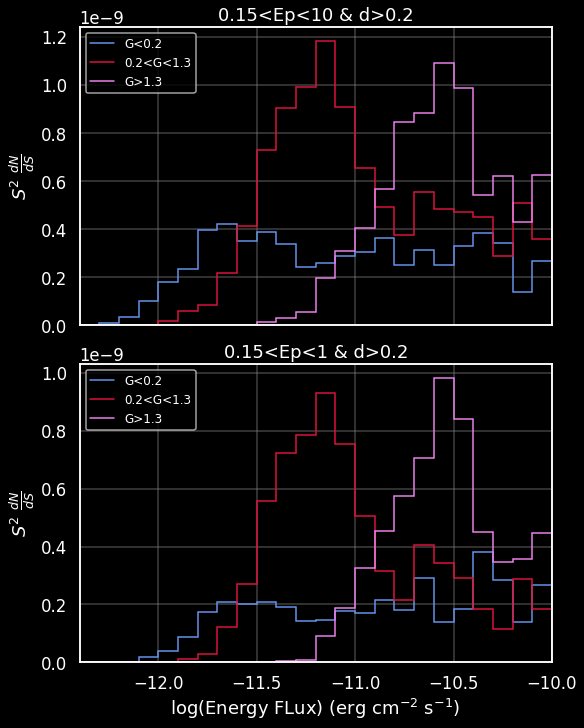

In [5]:
show(f"""### With selections: """)
fig, axx = plt.subplots(nrows=2, figsize=(8,10),sharex=True)
for emax, ax in zip((10,1), axx.flat):
    sel = f'0.15<Ep<{emax} & d>0.2'
    s2dnds_logs(fgdf.query(sel),ax=ax,  no_xlabel=(emax==10))
    ax.set_title(sel)

show(fig)

The query: "0.6<G<1 & logS<-11.10 &  d>0.2 & 0.2< Ep<1& R95<8 & dec>-40" 

selects 89 unID sources and 3 pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2976abff10>
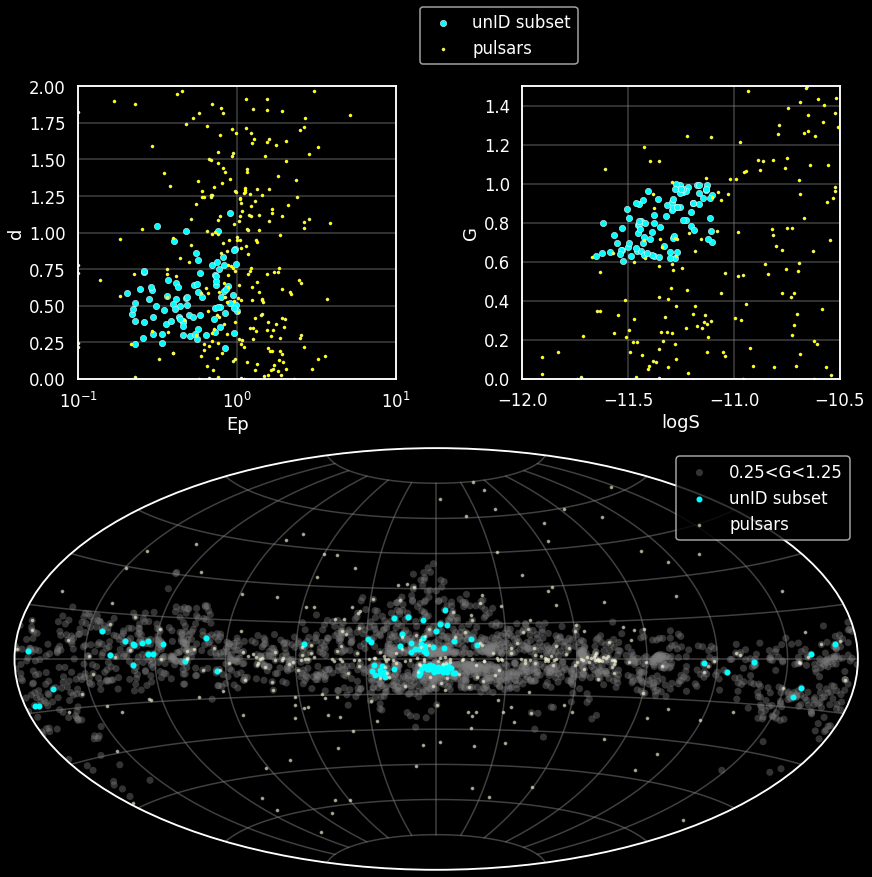

In [6]:
from pylib.skymaps import AITfigure
pulsars = fgdf.query('association=="psr" | association=="msp"')
# pulsars = fgdf.query('association=="msp"')
qa = '0.6<G<1 & logS<-11.10 &  d>0.2 & 0.2< Ep<1'
unid = fgdf.query('association=="unID"')
show(f"""The query: "{(q:=qa+'& R95<8 & dec>-40')}" """)
subset=unid.query(q)
show(f'selects {len(subset)} unID sources and {len(pulsars.query(q))} pulsars' )

def subset_scatter(subset, unid, pulsars): 

    fig = plt.figure(figsize=(12,12))
    (sfig1,sfig2) = fig.subfigures(nrows=2)
    (ax1,ax2) = sfig1.subplots(ncols=2,  )
    ax1.set(ylim=(0,2))
    sns.scatterplot(subset, ax=ax1, x='Ep',   y='d', s=40, color='cyan')
    sns.scatterplot(pulsars, ax=ax1, x='Ep',   y='G', s=10, color='yellow')
    ax1.set(xlim=(.100,10.00), xscale='log')
    sns.scatterplot(subset, ax=ax2, x='logS', y='G', s=40, color='cyan', label='unID subset')
    sns.scatterplot(pulsars, ax=ax2, x='logS', y='G', s=10, color='yellow', label='pulsars')
    plt.legend(bbox_to_anchor=(0.2,1.3))
    
    ax2.set(xlim=(-12,-10.5), xticks=np.arange(-12,-10.49, 0.5),ylim=(0,1.5), )

    Gcut = '0.25<G<1.25'
    (AITfigure(fig=sfig2)
     .scatter(fgdf.query(Gcut),s=50, color='0.5', label=Gcut, alpha=0.4,
              edgecolor='none')
     .scatter(subset, s=20, color='cyan', label='unID subset')
     .scatter(pulsars, s=5, color='lightyellow', label='pulsars',alpha=0.5)
     .legend()
    );
    return fig
show_fig(subset_scatter, subset, unid, pulsars)

## Look for 4FGL MSP candidates?

The query: "G<0.5 & Ep_unc<Ep/2 &  d>0.2 & 3>Ep>1& R95<8" 

selects 137 unID sources and 101 pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2935986320>
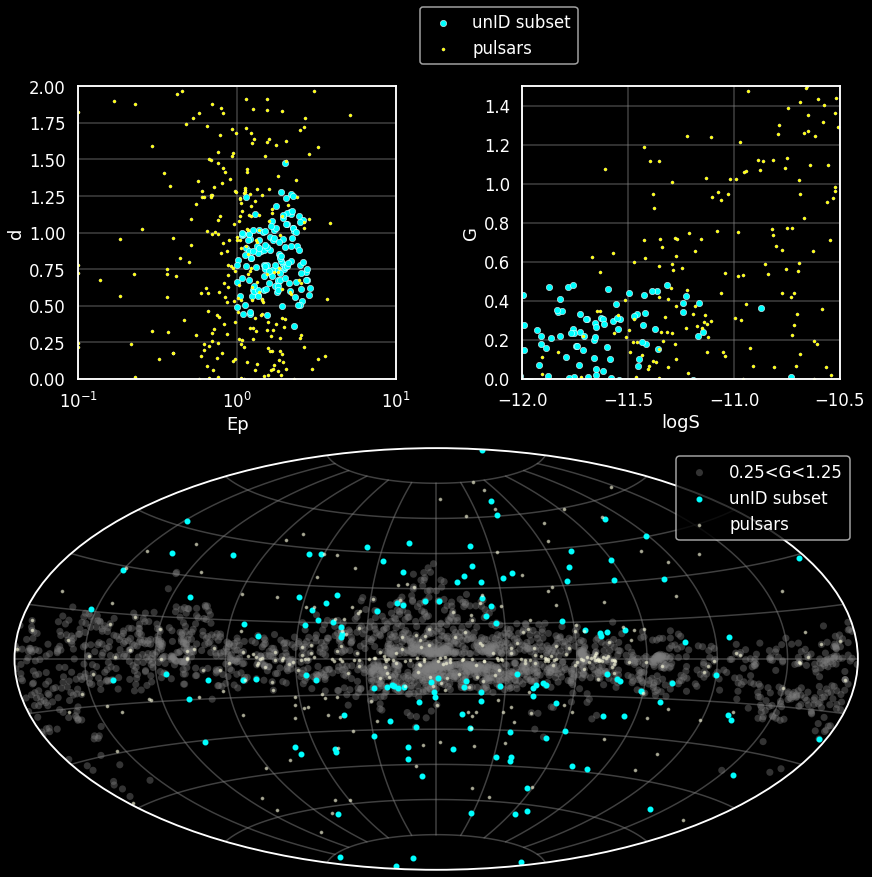

## Write out to file `files/msp_candidates.csv`

In [77]:
show(f"""## Look for 4FGL MSP candidates?""")
qp = 'G<0.5 & Ep_unc<Ep/2 &  d>0.2 & 3>Ep>1'

show(f"""The query: "{(q:=qp+'& R95<8')}" """)
subsetmsp=unid.query(q)
show(f'selects {len(subsetmsp)} unID sources and {len(pulsars.query(q))} pulsars' )
show_fig(subset_scatter, subsetmsp, unid, pulsars)


show(f"""## Write out to file `{(fn:='files/msp_candidates.csv')}`""")
subsetmsp.to_csv(fn, float_format='%.3f')

---
# Try with 16-year uw sources

Loaded 12036 sources from sources_uw1616.csv
* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_uw1216_v13.fits`
  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$
 select energy= 1000 MeV


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f29445deec0>
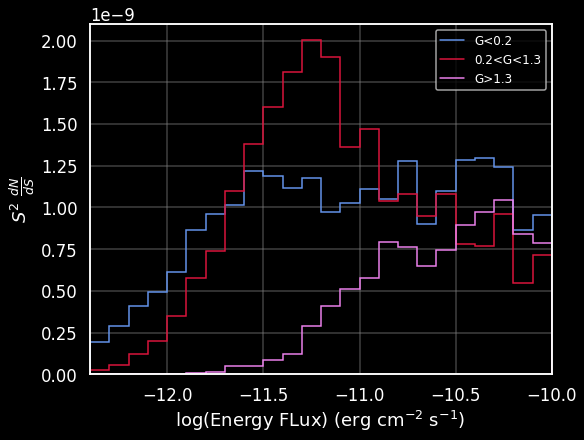

In [13]:
show(f"""---
# Try with 16-year uw sources""")
from pylib.pointlike import *
self=PointlikeModel()

df16 = self.df
df16['S'] = df16.eflux100
df16['logS'] = np.log10(df16.S)
df16['R95']  = np.sqrt(df16.a*df16.b)*df16.systematic*2.45*60

show(s2dnds_logs(df16))

### With selections: 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f29446f4790>
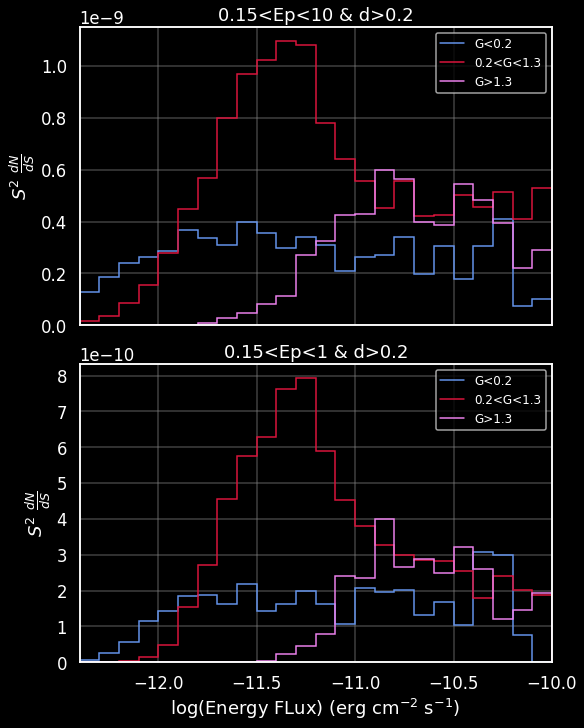

In [14]:
show(f"""### With selections: """)
fig, axx = plt.subplots(nrows=2, figsize=(8,10),sharex=True)
for emax, ax in zip((10,1), axx.flat):
    sel = f'0.15<Ep<{emax} & d>0.2'
    s2dnds_logs(ax=ax, df=self.df.query(sel).copy(), no_xlabel=(emax==10))
    ax.set_title(sel)

show(fig)

The query: "0.6<G<1 & logS<-11.10 &  d>0.2 & 0.2< Ep<1" 

selects 468 unID sources and 19 pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f293f30a0b0>
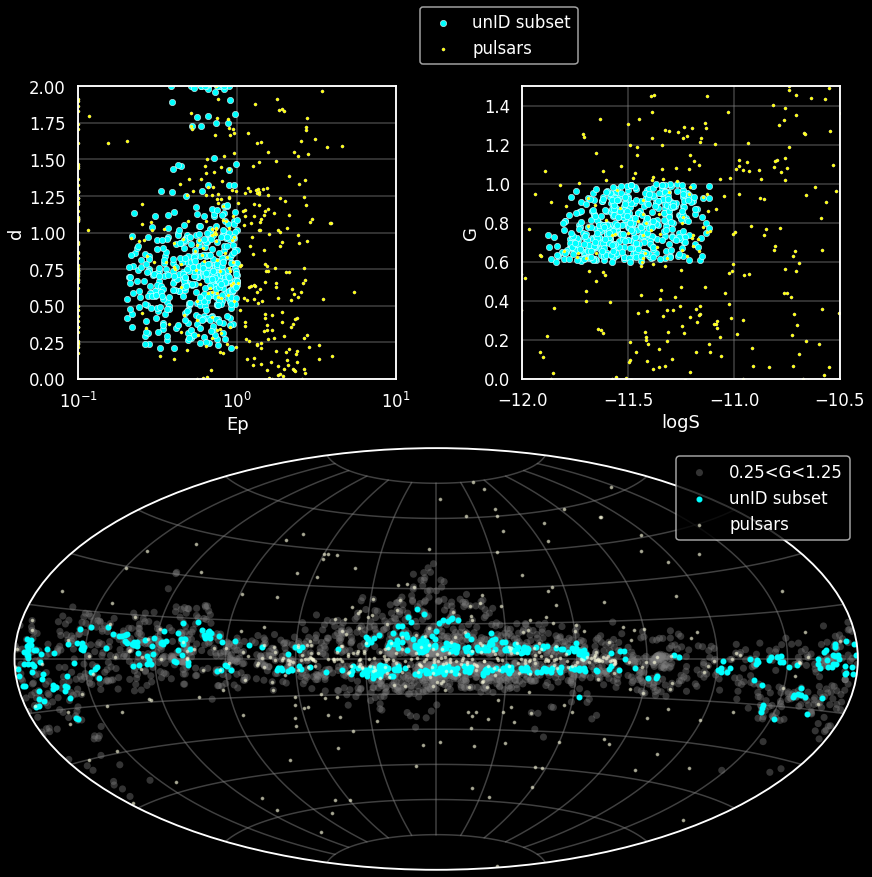

In [28]:
pulsars16 = df16.query('acat=="pulsar_lat" | acat=="pulsar_big"')
# pulsars = fgdf.query('association=="msp"')
qa = '0.6<G<1 & logS<-11.10 &  d>0.2 & 0.2< Ep<1'
unid16 = df16.query('aprob==0')

# show(f"""The query: "{(q:=qa+'& R95<16 & dec>-90')}" """)
show(f"""The query: "{(q:=qa)}" """)
subset16=unid16.query(q)
show(f'selects {len(subset16)} unID sources and {len(pulsars16.query(q))} pulsars' )
show_fig(subset_scatter, subset16, unid16, pulsars16)


## Look for MSP candidates?

The query: "G<0.5 &   d>0.2 & 4>Ep>1& R95<8" 

selects 844 unID sources and 119 pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2976abdb70>
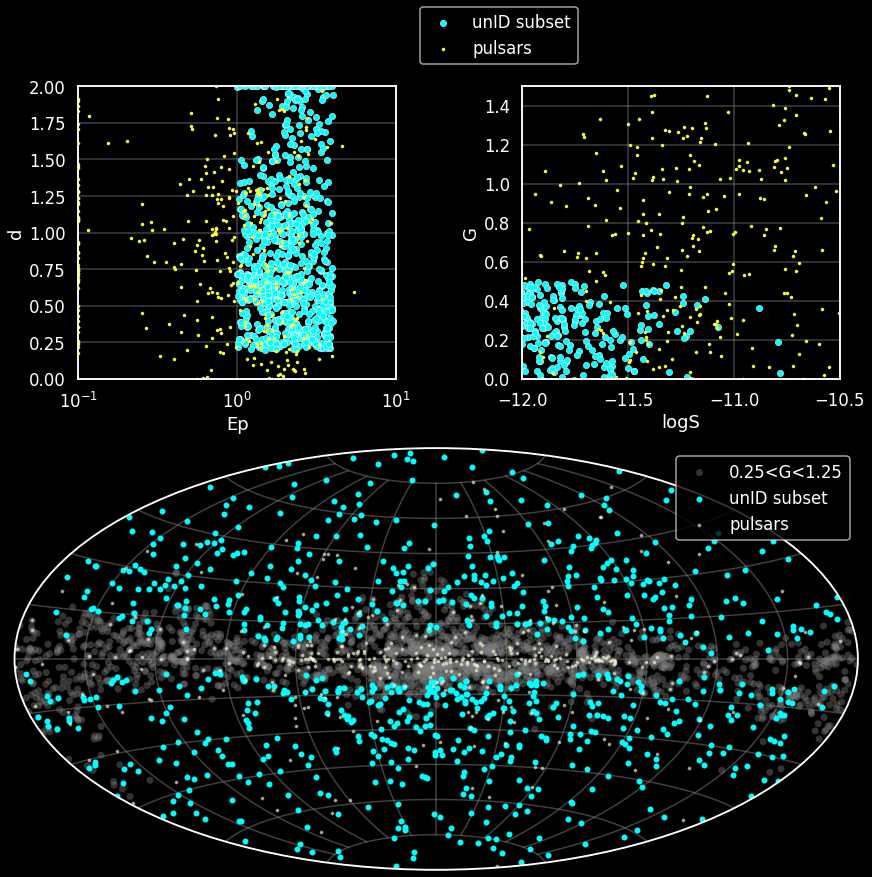

In [10]:
show(f"""## Look for MSP candidates?""")
qp = 'G<0.5 &   d>0.2 & 4>Ep>1'

show(f"""The query: "{(q:=qp+'& R95<8')}" """)
subset16=unid16.query(q)
show(f'selects {len(subset16)} unID sources and {len(pulsars16.query(q))} pulsars' )
show_fig(subset_scatter, subset16, unid16, pulsars16)



In [21]:
show(f""" ---
# Examine [Bruzewski_2023_ApJ_943_51](https://arxiv.org/abs/2212.05115)
Table 1, with 47 candidates: create a DataFrame below. (But mainly use the 4FGL name)""")
# Name FermiName Spectral Index LP SigCurv Signif Avg Candidate Type
with open('files/Bruzewski_2023_ApJ_943_51.txt','r') as inp:
    lines = inp.read().split('\n')
d = dict()
for line in lines:
    if len(line)>0 and line[0]=='#': continue
    if len((toks:=line.split()))==0: continue
    t = dict(#name=toks[0]+' '+toks[1],
                     #  fglname=toks[3],
           sp_index = float(toks[4]),
           sig_curv = float(toks[5]),
           significance=float(toks[6]),
           type = str(toks[7]),
            )
    d['4FGL '+toks[3]] = t
df = pd.DataFrame.from_dict(d,orient='index')
df.info()
assert len(set(df.index).intersection(fgl.index))== len(df), 'Not all in FGl-DR4'
df['ra'] = fgl.loc[df.index].ra
df['dec'] = fgl.loc[df.index].dec
from pylib.catalogs import CatDF
show(f"""Correlate with the 16-year dataset:
First make a formal catalog""")
class FL16(CatDF, pd.DataFrame):
    def __init__(self):
        super().__init__(unid16)
catunid = FL16()

---
# Examine [Bruzewski_2023_ApJ_943_51](https://arxiv.org/abs/2212.05115)
Table 1, with 47 candidates: create a DataFrame below. (But mainly use the 4FGL name)

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 4FGL J0159.0+3313 to 4FGL J2250.5+3305
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sp_index      47 non-null     float64
 1   sig_curv      47 non-null     float64
 2   significance  47 non-null     float64
 3   type          47 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


Correlate with the 16-year dataset:
First make a formal catalog

Found 38 / 47 matches within 0.1 deg

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f29449f7490>
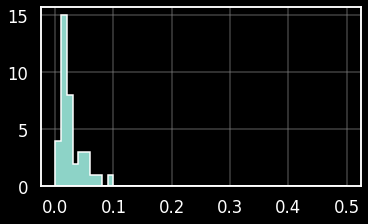

In [23]:
skydf = SkyCoord(df.ra, df.dec, unit='deg', frame='fk5')
z = [ catunid.catalog_entry(s, 0.1) for s in skydf]
u = pd.DataFrame([t for t in z if not t is None]); 
show(f""" Found {len(u)} / {len(df)} matches within 0.1 deg""")
plt.hist(u.sep,  bins=np.linspace(0,0.5,51), histtype='stepfilled')
show(plt.gcf())


47 found

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f29448bd3c0>
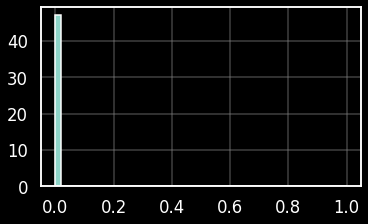

In [25]:
class Bruzewski(CatDF, pd.DataFrame):
    def __init__(self, df):
        super().__init__(df)
bdf = Bruzewski(df)
z = [ bdf.catalog_entry(s, 0.1) for s in skydf]
u = pd.DataFrame([t for t in z if not t is None]); 
show(f'{len(u)} found')
plt.hist(u.sep,  bins=np.linspace(0,1,51));
show(plt.gcf())

In [27]:
u.columns

Index(['sp_index', 'sig_curv', 'significance', 'type', 'ra', 'dec', 'sep',
       'fk5', 'galactic'],
      dtype='object')

47 are within 0.1 deg

ValueError: Could not interpret value `Ep` for parameter `x`

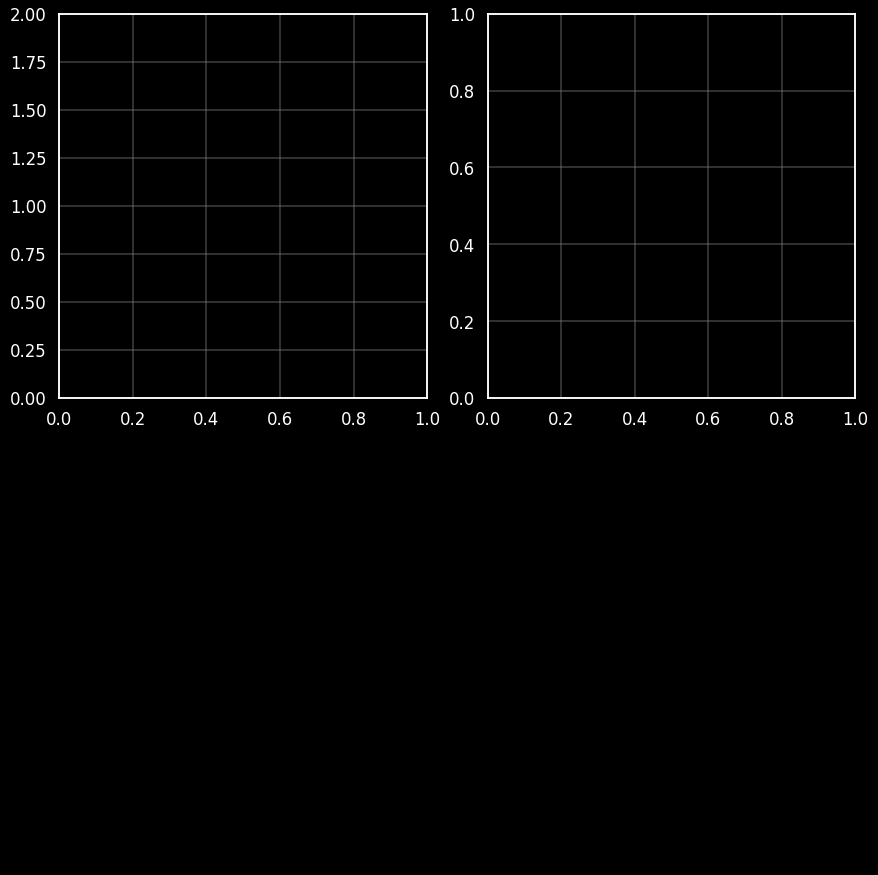

In [26]:
show(f"""{len(u)} are within 0.1 deg""")
show_fig(subset_scatter, u, unid16, pulsars16)

---
# Check localization quality

Are the "gevatars" typical?

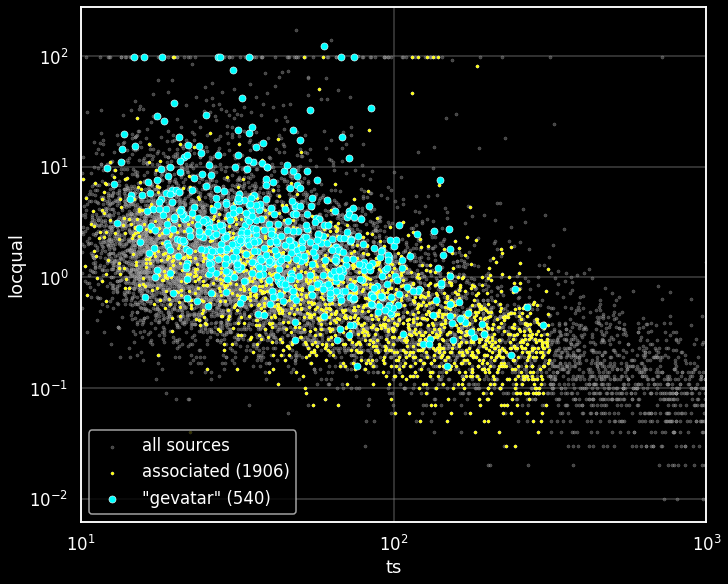

In [40]:
show(f"""---
# Check localization quality""")
ass=df16.query('aprob>0.8 & ts<314').copy()
gev=df16.query(qa).copy()
show("""Are the "gevatars" typical?""")
fig, ax = plt.subplots(figsize=(10,8))
skw = dict(ax=ax, x='ts', y=df16.locqual)#-np.log( 25/df.ts**0.85),)
sns.scatterplot(self.df, **skw, s=10, color='0.5', alpha=0.5,  label='all sources')
sns.scatterplot(ass, **skw, s=10, color='yellow',   label=f'associated ({len(ass)})')
sns.scatterplot(gev, **skw, s=50, color='cyan',
               label=f'"gevatar" ({len(gev)})', edgecolor='white')
ax.set(xscale='log', yscale='log',  xlim=(10,1000), )#ylim=(1e-3,150),);
# ax.plot((x:=np.logspace(1,3,25)), 25/(x)**0.85, '-r')
ax.legend();

## Rescale to remove TS dependence

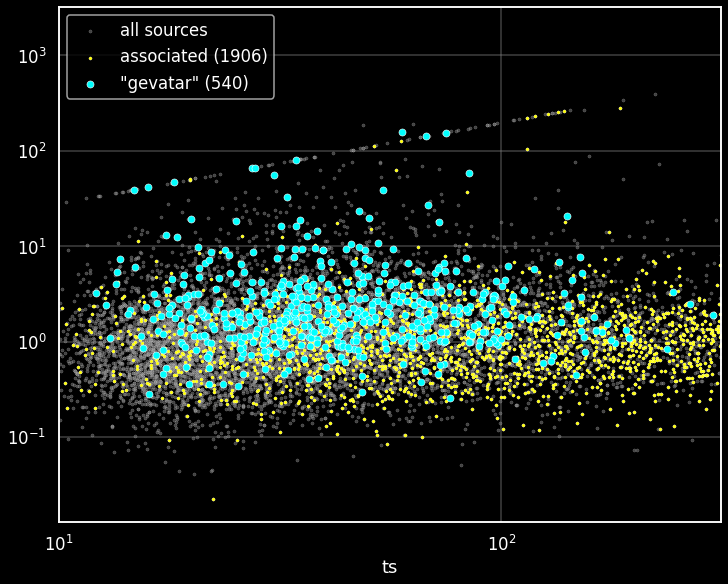

In [45]:
show(f"""## Rescale to remove TS dependence""")
fig, ax = plt.subplots(figsize=(10,8))
skw = dict(ax=ax, x='ts', y=df16.locqual / (25/df16.ts**0.85) )
sns.scatterplot(self.df, **skw, s=10, color='0.5', alpha=0.5,  label='all sources')
sns.scatterplot(ass, **skw, 
                s=10, color='yellow',   label=f'associated ({len(ass)})')
sns.scatterplot(gev, **skw, s=50, color='cyan',
               label=f'"gevatar" ({len(gev)})', edgecolor='white')
ax.set(xscale='log', yscale='log',  xlim=(10,314), )#ylim=(1e-3,150),);
# ax.plot((x:=np.logspace(1,3,25)), 25/(x)**0.85, '-r')
ax.legend();

## And project
Define function `qual(df)` to return scaled locqual value.

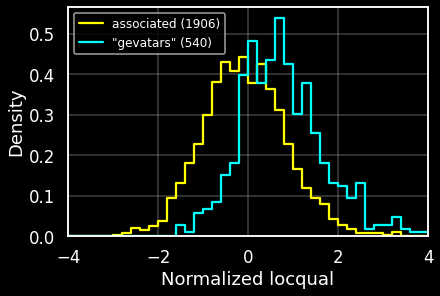

In [42]:
show(f"""## And project
Define function `qual(df)` to return scaled locqual value.""")
def qual(df):
    return np.log(df.locqual / (25/df.ts**0.85)) / 0.876 -0.0101
gev['locqual_normed'] = gev.apply(qual, axis=1)
ass['locqual_normed'] = gev.apply(qual, axis=1)

fig, ax = plt.subplots(figsize=(6,4))
hkw = dict(ax=ax, element='step', fill=False, stat='density', bins=np.arange(-4,4.01, 0.2))
sns.histplot(x=qual(ass),  **hkw, label=f'associated ({len(ass)})',color='yellow');
sns.histplot(x=qual(gev),  **hkw, label=f'"gevatars" ({len(gev)})', color='cyan');
# sns.histplot(x=qual(gev.query(q)),  **hkw, label='selected', color='violet');
ax.legend(fontsize=12)
ax.set(xlim=(-4,4), xlabel='Normalized locqual');
# z = qual(ass)
# np.std(z), np.mean(z)

In [44]:
show(f""" Write the {len(gev)} gevatar candidate to `{(fn:='files/gevatar_list.csv')}`""")
gev['ra dec ts R95 d Ep G logS locqual locqual_normed'.split()].to_csv(fn,float_format='%.3f' )

Write the 540 gevatar candidate to `files/gevatar_list.csv`

In [50]:
show(f"""Note: application of cut "{(cut:='R95<8 & dec>-40')}" yields {len(gev.query(cut))}""")

Note: application of cut "R95<8 & dec>-40" yields 128

In [66]:
skt = SkyCoord(gev.ra, gev.dec, unit='deg', frame='fk5')
t = [fgl.catalog_entry(s, 0.25) for s in skt]
show(f"""gevatars without DR4 association: {len( list(filter(lambda x: x is not None, t)))}""")

gevatars without DR4 association: 189

In [51]:
show(f"""# Compare with FL16 bad localizations
Zipfile with TSmaps at  `{(zfile:='../FL16/tsmap_fail.zip')}`""")

from zipfile import ZipFile
tsmaps = ZipFile(zfile)
fl = tsmaps.filelist
failed_names = [f.filename.split('/')[1] .split('_')[0] for f in fl]; len(names)
show(f""" * Gevatars: {len((found:=set(gev.index).intersection(set(failed_names))))} / {len(gev)}""")

show(f""" * Associated: {len((found:=set(ass.index).intersection(set(failed_names))))} / {len(ass)}""")

# Compare with FL16 bad localizations
Zipfile with TSmaps at  `../FL16/tsmap_fail.zip`

NameError: name 'names' is not defined